## Nathalie MAVEL Parcours Data-Scientist

### Projet 6 -- Classifier automatiquement des biens de consommations

In [3]:
# %%flake8  # checking PEP8 compliance
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
# import functions.functions_p6 as functions_p6

# increase the maximum number of columns to display
pd.set_option('max_colwidth', 1000)
pd.set_option('display.max_rows', 2000)
pd.set_option('display.max_columns', 2000)

In [4]:
from nltk.stem import SnowballStemmer

import re
from unidecode import unidecode

import nltk
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\natha\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\natha\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [5]:
from string import punctuation
from nltk.corpus import stopwords
from nltk import word_tokenize          
from nltk.stem import WordNetLemmatizer

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from os import listdir

In [7]:
import os
os.chdir('C:/Users/natha/Documents/OCR/DS_projet_6/flipkart')

In [8]:
data_init = pd.read_csv('flipkart_com-ecommerce_sample_1050.csv')
data_init.shape

(1050, 15)

In [9]:
data_init.dtypes

uniq_id                     object
crawl_timestamp             object
product_url                 object
product_name                object
product_category_tree       object
pid                         object
retail_price               float64
discounted_price           float64
image                       object
is_FK_Advantage_product       bool
description                 object
product_rating              object
overall_rating              object
brand                       object
product_specifications      object
dtype: object

In [10]:
data_init.head()

,uniq_id,crawl_timestamp,product_url,product_name,product_category_tree,pid,retail_price,discounted_price,image,is_FK_Advantage_product,description,product_rating,overall_rating,brand,product_specifications
0,55b85ea15a1536d46b7190ad6fff8ce7,2016-04-30 03:22:56 +0000,http://www.flipkart.com/elegance-polyester-multicolor-abstract-eyelet-door-curtain/p/itmeg7bkzdgthcts?pid=CRNEG7BKMFFYHQ8Z,Elegance Polyester Multicolor Abstract Eyelet Door Curtain,"[""Home Furnishing >> Curtains & Accessories >> Curtains >> Elegance Polyester Multicolor Abstract Eyelet Do...""]",CRNEG7BKMFFYHQ8Z,1899.0,899.0,55b85ea15a1536d46b7190ad6fff8ce7.jpg,False,"Key Features of Elegance Polyester Multicolor Abstract Eyelet Door Curtain Floral Curtain,Elegance Polyester Multicolor Abstract Eyelet Door Curtain (213 cm in Height, Pack of 2) Price: Rs. 899 This curtain enhances the look of the interiors.This curtain is made from 100% high quality polyester fabric.It features an eyelet style stitch with Metal Ring.It makes the room environment romantic and loving.This curtain is ant- wrinkle and anti shrinkage and have elegant apparance.Give your home a bright and modernistic appeal with these designs. The surreal attention is sure to steal hearts. These contemporary eyelet and valance curtains slide smoothly so when you draw them apart first thing in the morning to welcome the bright sun rays you want to wish good morning to the whole world and when you draw them close in the evening, you create the most special moments of joyous beauty given by the soothing prints. Bring home the elegant curtain that softly filters light in your room so that ...",No rating available,No rating available,Elegance,"{""product_specification""=>[{""key""=>""Brand"", ""value""=>""Elegance""}, {""key""=>""Designed For"", ""value""=>""Door""}, {""key""=>""Type"", ""value""=>""Eyelet""}, {""key""=>""Model Name"", ""value""=>""Abstract Polyester Door Curtain Set Of 2""}, {""key""=>""Model ID"", ""value""=>""Duster25""}, {""key""=>""Color"", ""value""=>""Multicolor""}, {""key""=>""Length"", ""value""=>""213 cm""}, {""key""=>""Number of Contents in Sales Package"", ""value""=>""Pack of 2""}, {""key""=>""Sales Package"", ""value""=>""2 Curtains""}, {""key""=>""Material"", ""value""=>""Polyester""}]}"
1,7b72c92c2f6c40268628ec5f14c6d590,2016-04-30 03:22:56 +0000,http://www.flipkart.com/sathiyas-cotton-bath-towel/p/itmegfzhxbyucwgn?pid=BTWEGFZHGBXPHZUH,Sathiyas Cotton Bath Towel,"[""Baby Care >> Baby Bath & Skin >> Baby Bath Towels >> Sathiyas Baby Bath Towels >> Sathiyas Cotton Bath Towel (3 Bath Towel, Red, Y...""]",BTWEGFZHGBXPHZUH,600.0,449.0,7b72c92c2f6c40268628ec5f14c6d590.jpg,False,"Specifications of Sathiyas Cotton Bath Towel (3 Bath Towel, Red, Yellow, Blue) Bath Towel Features Machine Washable Yes Material Cotton Design Self Design General Brand Sathiyas Type Bath Towel GSM 500 Model Name Sathiyas cotton bath towel Ideal For Men, Women, Boys, Girls Model ID asvtwl322 Color Red, Yellow, Blue Size Mediam Dimensions Length 30 inch Width 60 inch In the Box Number of Contents in Sales Package 3 Sales Package 3 Bath Towel",No rating available,No rating available,Sathiyas,"{""product_specification""=>[{""key""=>""Machine Washable"", ""value""=>""Yes""}, {""key""=>""Material"", ""value""=>""Cotton""}, {""key""=>""Design"", ""value""=>""Self Design""}, {""key""=>""Brand"", ""value""=>""Sathiyas""}, {""key""=>""Type"", ""value""=>""Bath Towel""}, {""key""=>""GSM"", ""value""=>""500""}, {""key""=>""Model Name"", ""value""=>""Sathiyas cotton bath towel""}, {""key""=>""Ideal For"", ""value""=>""Men, Women, Boys, Girls""}, {""key""=>""Model ID"", ""value""=>""asvtwl322""}, {""key""=>""Color"", ""value""=>""Red, Yellow, Blue""}, {""key""=>""Size"", ""value""=>""Mediam""}, {""key""=>""Length"", ""value""=>""30 inch""}, {""key""=>""Width"", ""value""=>""60 inch""}, {""key""=>""Number of Contents in Sales Package"", ""value""=>""3""}, {""key""=>""Sales Package"", ""value""=>""3 Bath Towel""}]}"
2,64

In [11]:
# mettre en minuscule toutes les strings du df
df = data_init.apply(lambda x: x.str.lower() if(x.dtype == "object") else x)

In [12]:
# select varaiables
df = df[[ 'product_category_tree', 'description', 'image']]

**Identify categories**

In [13]:
#split first category
df[['category_first', 'category_detail']] = df['product_category_tree'].str.split(">>", 1, expand=True)

In [14]:
# drop variables not used
df = df.drop(['category_detail', 'product_category_tree'], axis=1)

In [15]:
# drop punctuation in categor first
df['category_first'] = df['category_first'].str.replace('[{}]'.format(punctuation), '')
# drop spaceincategory first
df['category_first'] = df['category_first'].str.replace(' ', '')

<ipython-input-15-869128498dfb>:2: FutureWarning: The default value of regex will change from True to False in a future version.
  df['category_first'] = df['category_first'].str.replace('[{}]'.format(punctuation), '')


In [16]:
df['category_first'].unique()

array(['homefurnishing', 'babycare', 'watches', 'homedecorfestiveneeds',
       'kitchendining', 'beautyandpersonalcare', 'computers'],
      dtype=object)

[Text(0.5, 0, 'Nombre de produits')]

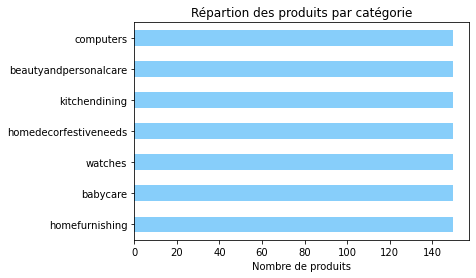

In [17]:
# df['category_simple'].barplot()
fig_1 = df.category_first.value_counts().plot(kind='barh',
                                                     title='Répartion des produits par catégorie',
                                                     color='lightskyblue')
fig_1.set(xlabel='Nombre de produits')

In [18]:
df.category_first.value_counts()

homefurnishing           150
babycare                 150
watches                  150
homedecorfestiveneeds    150
kitchendining            150
beautyandpersonalcare    150
computers                150
Name: category_first, dtype: int64

**Les produits sont répartis à 150 produits pour les 7 catégories**

### Clean description

In [19]:
df['description'] = df['description'].str.replace('[{}]'.format(punctuation), '')

<ipython-input-19-62922cfd6d2c>:1: FutureWarning: The default value of regex will change from True to False in a future version.
  df['description'] = df['description'].str.replace('[{}]'.format(punctuation), '')


In [20]:
puncs = punctuation

In [21]:
df['description'] = df['description'].replace(str.maketrans('', '', puncs))

In [22]:
df = df.replace("[\(\[].*?[\)\]]", "",regex=True)

In [23]:
# drop numbers
df['description'] = df['description'].str.replace('\d+', '')

<ipython-input-23-78ef28e2d73a>:2: FutureWarning: The default value of regex will change from True to False in a future version.
  df['description'] = df['description'].str.replace('\d+', '')


In [24]:
# define stopwords
sw = set(stopwords.words('english'))

In [25]:
# drop stopwords
df['description'] = df['description'].apply(
        lambda x: ' '.join([word for word in x.split() if word not in (sw)]))

In [26]:
# drop 1 character unique
import string
alpha = list(string.ascii_lowercase)

In [27]:
df['description'] = df['description'].apply(
        lambda x: ' '.join([word for word in x.split() if word not in (alpha)]))

In [28]:
# drop quantities units

from quantities import units

unit_symbols = [u.symbol for _, u in units.__dict__.items()
    if isinstance(u, type(units.deg))]

In [29]:
df['description'] = df['description'].apply(
        lambda x: ' '.join([word for word in x.split() if word not in (unit_symbols)]))

In [30]:
#  lemmatization
w_tokenizer = nltk.tokenize.WhitespaceTokenizer()
lemmatizer = nltk.stem.WordNetLemmatizer()

def lemmatize_text(text):
    lemmatizer_list = [lemmatizer.lemmatize(w) for w in w_tokenizer.tokenize(text)]
    lemmatizer_list = ' '.join(str(v) for v in lemmatizer_list)
    
    return lemmatizer_list

In [31]:
df['lemmatized_text'] = df.description.apply(lemmatize_text)

In [32]:
df['lemmatized_text'] = df['lemmatized_text'].apply(
        lambda x: ' '.join([word for word in x.split() if word not in (alpha)]))

In [33]:
# df['lemmatized_text'] = df['lemmatized_text'].apply(
#         lambda x: ' '.join([word for word in x.split() if word not in (sw2)]))

In [34]:
df.head(1)

,description,image,category_first,lemmatized_text
0,key features elegance polyester multicolor abstract eyelet door curtain floral curtainelegance polyester multicolor abstract eyelet door curtain height pack price rs curtain enhances look interiorsthis curtain made high quality polyester fabricit features eyelet style stitch metal ringit makes room environment romantic lovingthis curtain ant wrinkle anti shrinkage elegant apparancegive home bright modernistic appeal designs surreal attention sure steal hearts contemporary eyelet valance curtains slide smoothly draw apart first thing morning welcome bright sun rays want wish good morning whole world draw close evening create special moments joyous beauty given soothing prints bring home elegant curtain softly filters light room get right amount sunlightspecifications elegance polyester multicolor abstract eyelet door curtain height pack general brand elegance designed door type eyelet model name abstract polyester door curtain set model id duster color multicolor dimensions length b...,55b85ea15a1536d46b7190ad6fff8ce7.jpg,homefurnishing,key feature elegance polyester multicolor abstract eyelet door curtain floral curtainelegance polyester multicolor abstract eyelet door curtain height pack price curtain enhances look interiorsthis curtain made high quality polyester fabricit feature eyelet style stitch metal ringit make room environment romantic lovingthis curtain ant wrinkle anti shrinkage elegant apparancegive home bright modernistic appeal design surreal attention sure steal heart contemporary eyelet valance curtain slide smoothly draw apart first thing morning welcome bright sun ray want wish good morning whole world draw close evening create special moment joyous beauty given soothing print bring home elegant curtain softly filter light room get right amount sunlightspecifications elegance polyester multicolor abstract eyelet door curtain height pack general brand elegance designed door type eyelet model name abstract polyester door curtain set model id duster color multicolor dimension length box number cont...


In [35]:
#  Tokenisation
df['tokenize_text'] = df['description'].apply(word_tokenize)

In [36]:
df.head(1)

,description,image,category_first,lemmatized_text,tokenize_text
0,key features elegance polyester multicolor abstract eyelet door curtain floral curtainelegance polyester multicolor abstract eyelet door curtain height pack price rs curtain enhances look interiorsthis curtain made high quality polyester fabricit features eyelet style stitch metal ringit makes room environment romantic lovingthis curtain ant wrinkle anti shrinkage elegant apparancegive home bright modernistic appeal designs surreal attention sure steal hearts contemporary eyelet valance curtains slide smoothly draw apart first thing morning welcome bright sun rays want wish good morning whole world draw close evening create special moments joyous beauty given soothing prints bring home elegant curtain softly filters light room get right amount sunlightspecifications elegance polyester multicolor abstract eyelet door curtain height pack general brand elegance designed door type eyelet model name abstract polyester door curtain set model id duster color multicolor dimensions length b...,55b85ea15a1536d46b7190ad6fff8ce7.jpg,homefurnishing,key feature elegance polyester multicolor abstract eyelet door curtain floral curtainelegance polyester multicolor abstract eyelet door curtain height pack price curtain enhances look interiorsthis curtain made high quality polyester fabricit feature eyelet style stitch metal ringit make room environment romantic lovingthis curtain ant wrinkle anti shrinkage elegant apparancegive home bright modernistic appeal design surreal attention sure steal heart contemporary eyelet valance curtain slide smoothly draw apart first thing morning welcome bright sun ray want wish good morning whole world draw close evening create special moment joyous beauty given soothing print bring home elegant curtain softly filter light room get right amount sunlightspecifications elegance polyester multicolor abstract eyelet door curtain height pack general brand elegance designed door type eyelet model name abstract polyester door curtain set model id duster color multicolor dimension length box number cont...,"[key, features, elegance, polyester, multicolor, abstract, eyelet, door, curtain, floral, curtainelegance, polyester, multicolor, abstract, eyelet, door, curtain, height, pack, price, rs, curtain, enhances, look, interiorsthis, curtain, made, high, quality, polyester, fabricit, features, eyelet, style, stitch, metal, ringit, makes, room, environment, romantic, lovingthis, curtain, ant, wrinkle, anti, shrinkage, elegant, apparancegive, home, bright, modernistic, appeal, designs, surreal, attention, sure, steal, hearts, contemporary, eyelet, valance, curtains, slide, smoothly, draw, apart, first, thing, morning, welcome, bright, sun, rays, want, wish, good, morning, whole, world, draw, close, evening, create, special, moments, joyous, beauty, given, soothing, prints, bring, home, elegant, curtain, softly, filters, light, room, get, ...]"


In [37]:
#  stemmatisation
from nltk.stem.snowball import SnowballStemmer

# Use English stemmer.
stemmer = SnowballStemmer("english")

In [38]:
df['stemmed_text'] = df['tokenize_text'].apply(lambda x: [stemmer.stem(y) for y in x]) # Stem every word.

In [39]:
df.head(1)

,description,image,category_first,lemmatized_text,tokenize_text,stemmed_text
0,key features elegance polyester multicolor abstract eyelet door curtain floral curtainelegance polyester multicolor abstract eyelet door curtain height pack price rs curtain enhances look interiorsthis curtain made high quality polyester fabricit features eyelet style stitch metal ringit makes room environment romantic lovingthis curtain ant wrinkle anti shrinkage elegant apparancegive home bright modernistic appeal designs surreal attention sure steal hearts contemporary eyelet valance curtains slide smoothly draw apart first thing morning welcome bright sun rays want wish good morning whole world draw close evening create special moments joyous beauty given soothing prints bring home elegant curtain softly filters light room get right amount sunlightspecifications elegance polyester multicolor abstract eyelet door curtain height pack general brand elegance designed door type eyelet model name abstract polyester door curtain set model id duster color multicolor dimensions length b...,55b85ea15a1536d46b7190ad6fff8ce7.jpg,homefurnishing,key feature elegance polyester multicolor abstract eyelet door curtain floral curtainelegance polyester multicolor abstract eyelet door curtain height pack price curtain enhances look interiorsthis curtain made high quality polyester fabricit feature eyelet style stitch metal ringit make room environment romantic lovingthis curtain ant wrinkle anti shrinkage elegant apparancegive home bright modernistic appeal design surreal attention sure steal heart contemporary eyelet valance curtain slide smoothly draw apart first thing morning welcome bright sun ray want wish good morning whole world draw close evening create special moment joyous beauty given soothing print bring home elegant curtain softly filter light room get right amount sunlightspecifications elegance polyester multicolor abstract eyelet door curtain height pack general brand elegance designed door type eyelet model name abstract polyester door curtain set model id duster color multicolor dimension length box number cont...,"[key, features, elegance, polyester, multicolor, abstract, eyelet, door, curtain, floral, curtainelegance, polyester, multicolor, abstract, eyelet, door, curtain, height, pack, price, rs, curtain, enhances, look, interiorsthis, curtain, made, high, quality, polyester, fabricit, features, eyelet, style, stitch, metal, ringit, makes, room, environment, romantic, lovingthis, curtain, ant, wrinkle, anti, shrinkage, elegant, apparancegive, home, bright, modernistic, appeal, designs, surreal, attention, sure, steal, hearts, contemporary, eyelet, valance, curtains, slide, smoothly, draw, apart, first, thing, morning, welcome, bright, sun, rays, want, wish, good, morning, whole, world, draw, close, evening, create, special, moments, joyous, beauty, given, soothing, prints, bring, home, elegant, curtain, softly, filters, light, room, get, ...]","[key, featur, eleg, polyest, multicolor, abstract, eyelet, door, curtain, floral, curtaineleg, polyest, multicolor, abstract, eyelet, door, curtain, height, pack, price, rs, curtain, enhanc, look, interiorsthi, curtain, made, high, qualiti, polyest, fabricit, featur, eyelet, style, stitch, metal, ringit, make, room, environ, romant, lovingthi, curtain, ant, wrinkl, anti, shrinkag, eleg, apparanceg, home, bright, modernist, appeal, design, surreal, attent, sure, steal, heart, contemporari, eyelet, valanc, curtain, slide, smooth, draw, apart, first, thing, morn, welcom, bright, sun, ray, want, wish, good, morn, whole, world, draw, close, even, creat, special, moment, joyous, beauti, given, sooth, print, bring, home, eleg, curtain, soft, filter, light, room, get, ...]"


### Select DF with lemmatized

In [40]:
df_clean = df[['image', 'category_first', 'lemmatized_text']]

In [41]:
# stotword  add manually
sw2 = ['key', 'feature', 'elegance', 'price', 'best', 
       'product', 'shipping', 'cash', "delivery", 'day', 'genuine', 'sale']

In [42]:
df_clean['lemmatized_text'] = df_clean['lemmatized_text'].apply(
        lambda x: ' '.join([word for word in x.split() if word not in (sw2)]))

<ipython-input-42-474d20e4f9a3>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['lemmatized_text'] = df_clean['lemmatized_text'].apply(


In [43]:
df_clean.head(1)

,image,category_first,lemmatized_text
0,55b85ea15a1536d46b7190ad6fff8ce7.jpg,homefurnishing,polyester multicolor abstract eyelet door curtain floral curtainelegance polyester multicolor abstract eyelet door curtain height pack curtain enhances look interiorsthis curtain made high quality polyester fabricit eyelet style stitch metal ringit make room environment romantic lovingthis curtain ant wrinkle anti shrinkage elegant apparancegive home bright modernistic appeal design surreal attention sure steal heart contemporary eyelet valance curtain slide smoothly draw apart first thing morning welcome bright sun ray want wish good morning whole world draw close evening create special moment joyous beauty given soothing print bring home elegant curtain softly filter light room get right amount sunlightspecifications polyester multicolor abstract eyelet door curtain height pack general brand designed door type eyelet model name abstract polyester door curtain set model id duster color multicolor dimension length box number content package pack package curtain body design material...


### Bag of Word

<ipython-input-44-2a153fc0e85c>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['lemmatized_len'] = df_clean['lemmatized_text'].apply(len)


null values :  description        0
image              0
category_first     0
lemmatized_text    0
tokenize_text      0
stemmed_text       0
dtype: int64


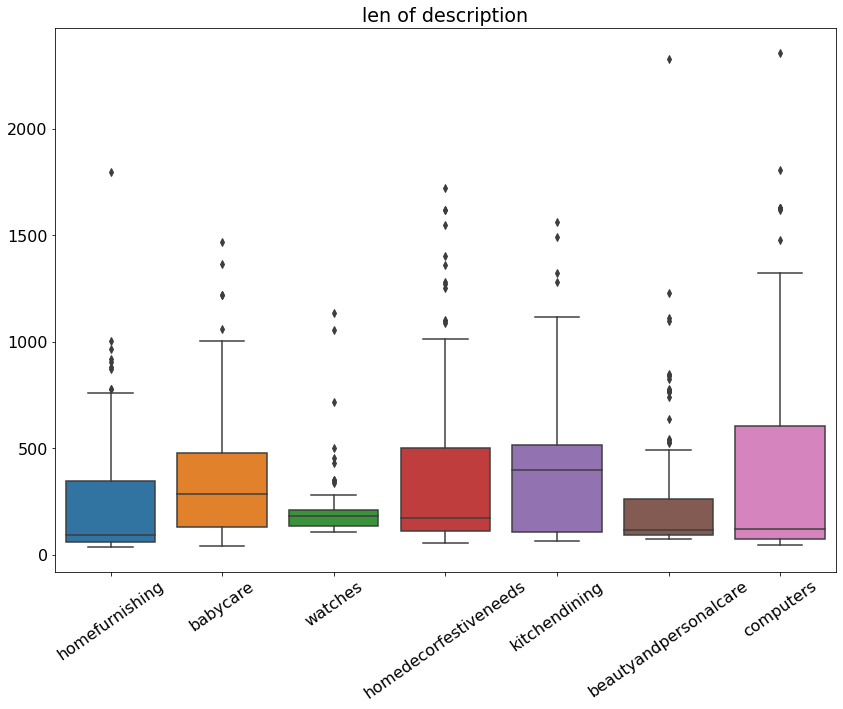

In [44]:
# print("Class distribution:\n{}".format(df["description"].value_counts()))

# Check for null values
check = df.isnull().sum()
print('null values : ',check)

df_clean['lemmatized_len'] = df_clean['lemmatized_text'].apply(len)

# df['Quarters'].apply(len)

plt.figure(figsize=(14, 10))
plt.rcParams.update({'font.size': 16})
sns.boxplot(x='category_first', y='lemmatized_len', data=df_clean)
plt.xticks(rotation=35)
plt.title('len of description')
plt.ylabel('')
plt.xlabel('');

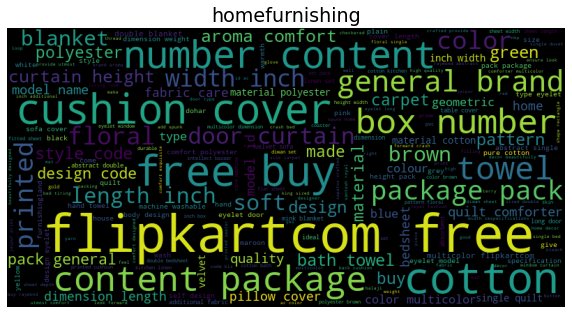

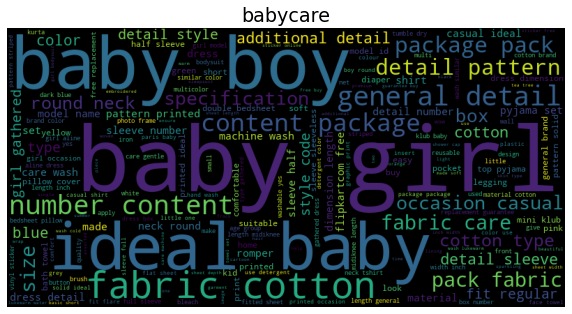

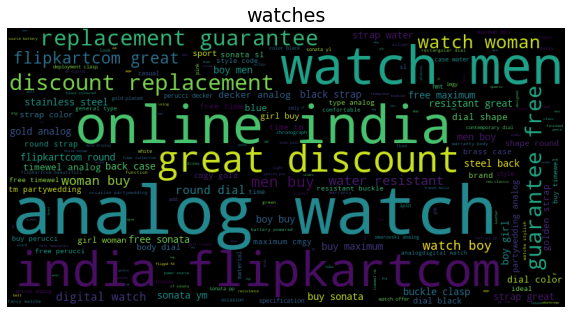

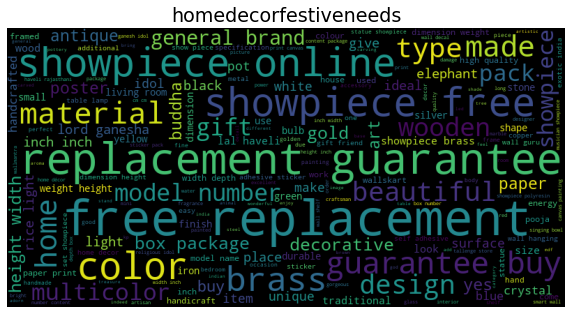

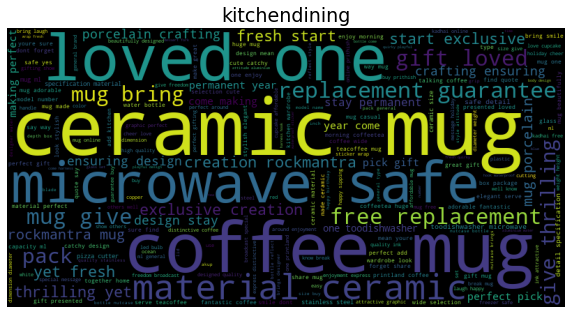

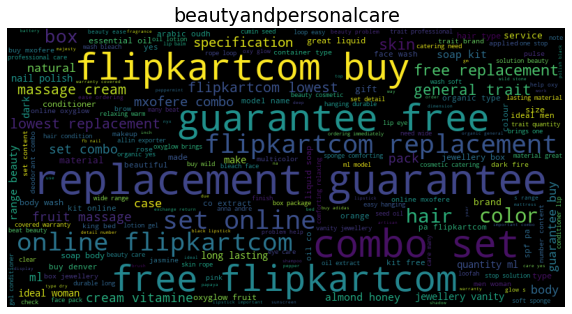

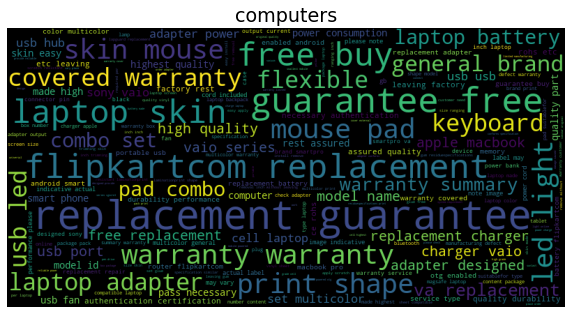

In [45]:
#@title WordCloud {display-mode: "form"}
#@markdown ---
from wordcloud import WordCloud
for c in df_clean["category_first"].unique() : 
    df_temp = df_clean.loc[df_clean["category_first"] == c]
    wc_temp = WordCloud(
        width = 800, 
        height = 400, 
    ).generate(" ".join(df_temp["lemmatized_text"]))

    plt.figure(figsize = (10,10))
    plt.imshow(wc_temp)
    plt.title(c)
    plt.axis("off")
    plt.show()
    

**Corpus**

In [46]:
# Aggregate all the descriptions together
corpus = df_clean['lemmatized_text'].str.cat(sep=' ')

# Get the list of words
list_words = corpus.split()
print("Number of words: {}".format(len(list_words)))
print("Number of unique words: {}".format(len(set(list_words))))


Number of words: 47562
Number of unique words: 5113


**Bag of word**

In [47]:
from sklearn.feature_extraction.text import CountVectorizer

corpus = [corpus]
cv = CountVectorizer()
cv_fit = cv.fit_transform(corpus)    
Word_list = cv.get_feature_names();    
count_list = cv_fit.toarray().sum(axis=0)

C:\Users\natha\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [48]:
cv.vocabulary_

{'polyester': 3413,
 'multicolor': 2932,
 'abstract': 19,
 'eyelet': 1594,
 'door': 1309,
 'curtain': 1092,
 'floral': 1743,
 'curtainelegance': 1093,
 'height': 2086,
 'pack': 3196,
 'enhances': 1477,
 'look': 2627,
 'interiorsthis': 2312,
 'made': 2686,
 'high': 2105,
 'quality': 3593,
 'fabricit': 1603,
 'style': 4380,
 'stitch': 4331,
 'metal': 2811,
 'ringit': 3805,
 'make': 2704,
 'room': 3839,
 'environment': 1501,
 'romantic': 3835,
 'lovingthis': 2652,
 'ant': 180,
 'wrinkle': 5044,
 'anti': 184,
 'shrinkage': 4088,
 'elegant': 1443,
 'apparancegive': 206,
 'home': 2135,
 'bright': 549,
 'modernistic': 2870,
 'appeal': 208,
 'design': 1198,
 'surreal': 4447,
 'attention': 283,
 'sure': 4438,
 'steal': 4314,
 'heart': 2078,
 'contemporary': 963,
 'valance': 4787,
 'slide': 4160,
 'smoothly': 4187,
 'draw': 1321,
 'apart': 201,
 'first': 1704,
 'thing': 4577,
 'morning': 2893,
 'welcome': 4948,
 'sun': 4409,
 'ray': 3648,
 'want': 4901,
 'wish': 5001,
 'good': 1948,
 'whole': 49

In [49]:
values_list = pd.DataFrame()

In [50]:
values_list['Word_list'] = Word_list
values_list['count_list'] = count_list

In [51]:
values_list.head()

,Word_list,count_list
0,aa,3
1,aaa,1
2,aapno,8
3,aari,5
4,aarika,1


In [52]:
values_list.describe().round()

,count_list
count,5102.0
mean,9.0
std,32.0
min,1.0
25%,1.0
50%,2.0
75%,5.0
max,612.0


<AxesSubplot:>

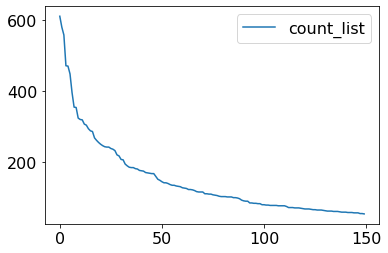

In [53]:
values_list_higth = values_list.sort_values(by=['count_list'], ascending=False).head(150)
values_list_higth = values_list_higth.reset_index(drop=True)
values_list_higth.plot()

<AxesSubplot:>

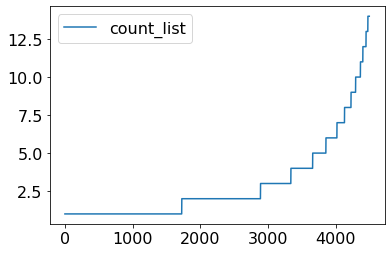

In [54]:
values_list_bottom = values_list.sort_values(by=['count_list'], ascending=True).head(4500)
values_list_bottom = values_list_bottom.reset_index(drop=True)
values_list_bottom.plot()

## Tfidf

In [55]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Instanciation of the tf-idf vectorizer
tfidf_vectorizer = TfidfVectorizer(
    strip_accents='unicode',
    lowercase=True,
    stop_words='english',
    analyzer='word',
    max_df=0.97,
    min_df=3,
    ngram_range=(1, 1),
)

# Application of the tf-idf vectorizer
corpus = df_clean['lemmatized_text']
X = tfidf_vectorizer.fit_transform(corpus)
# Conversion to a dense array for later use
X_dense = X.todense()

print('Size of the vocabulary: {}'.format(len(list(tfidf_vectorizer.vocabulary_))))
print('Number of stop words: {}'.format(len(tfidf_vectorizer.stop_words_)))

Size of the vocabulary: 1382
Number of stop words: 3605


In [56]:
sw3 = tfidf_vectorizer.stop_words_

In [57]:
values_list.columns

Index(['Word_list', 'count_list'], dtype='object')

In [58]:
values_list_after_tf = values_list.copy()

In [59]:
values_list_after_tf = values_list_after_tf[~values_list_after_tf['Word_list'].isin(sw3)]

In [60]:
values_list_after_tf  = values_list_after_tf.dropna().reset_index(drop=True)

<AxesSubplot:>

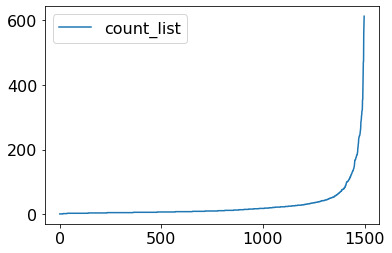

In [61]:
values_list_after_tf = values_list_after_tf.sort_values(by=['count_list'], ascending=True).head(2000)
values_list_after_tf = values_list_after_tf.reset_index(drop=True)
values_list_after_tf.plot()

In [62]:
# lists = sorted(vacabulary.items()) # sorted by key, return a list of tuples
# x, y = zip(*lists) # unpack a list of pairs into two tuples

# plt.plot(x, y)
# plt.show()

In [63]:
# lists

## Latent Dirichlet Allocation (LDA)

In [64]:
# from sklearn.feature_extraction.text import CountVectorizer

# # corpus = [corpus]
# cv = CountVectorizer(max_df=0.95, min_df=2, max_features=300, stop_words ='english')   
# cv_fit = cv.fit_transform(corpus)

In [65]:
corpus_3 = corpus[0].split(sep=' ')

In [66]:
from sklearn.decomposition import LatentDirichletAllocation
n_topics = 10

# Créer le modèle LDA
lda = LatentDirichletAllocation(
        n_components=n_topics, 
        max_iter=100, 
        learning_method='online', 
        learning_offset=50.,
        random_state=0)

# Fitter sur les données
lda.fit(X)

LatentDirichletAllocation(learning_method='online', learning_offset=50.0,
                          max_iter=100, random_state=0)

In [67]:
def display_topics(model, feature_names, no_top_words):
    for topic_idx, topic in enumerate(model.components_):
        print("Topic {}:".format(topic_idx))
        print(" ".join([feature_names[i] for i in topic.argsort()[:-no_top_words - 1:-1]]))
    return (topic_idx)

no_top_words = 15
display_topics(lda, Word_list, no_top_words)

Topic 0:
base admiration borse cut denver changer cutter bread calibration comforting disease craftuno dhol behind conditioner
Topic 1:
deluxe door cheek draw draping carbord belt cmjaycoknit additionally bravecaliber date cover bmw appears ammoniafree
Topic 2:
cutter distractionsreiki dressjacadi carving breasted alternatively alrams carrier alsospecifications displayed able conductivity choose appiosandroidspecifications chokree
Topic 3:
deserve bodysuits app briefcase chevron aci bristlesspecifications click calorie alarmhour alive aster care conforms cutten
Topic 4:
casted asus bold cocktail character double alcohol coolhonour benefit cm bertelin bench booty antenna cmx
Topic 5:
clothes dgred beer damage assemblermshoppee celsius blazer adhesive btsb adorning cleanspecifications crew contrl cpgw bluebeige
Topic 6:
civil animated babyoye composition bengal calorie attivo adino ammoniafree attribute bmw charge applying cocoamido assorted
Topic 7:
distractionsreiki better daughterwith

9

In [68]:
# import pyLDAvis.gensim
# pyLDAvis.enable_notebook()

# import warnings
# warnings.filterwarnings("ignore", category=DeprecationWarning) 

# pyLDAvis.gensim.prepare(model, corpus, dictionary)

In [69]:
# from collections import Counter

# topics = lda.show_topics(formatted=False)
# data_flat = [w for w_list in data_ready for w in w_list]
# counter = Counter(data_flat)

# out = []
# for i, topic in topics:
#     for word, weight in topic:
#         out.append([word, i , weight, counter[word]])

# df = pd.DataFrame(out, columns=['word', 'topic_id', 'importance', 'word_count'])        

# # Plot Word Count and Weights of Topic Keywords
# fig, axes = plt.subplots(2, 2, figsize=(16,10), sharey=True, dpi=160)
# cols = [color for name, color in mcolors.TABLEAU_COLORS.items()]
# for i, ax in enumerate(axes.flatten()):
#     ax.bar(x='word', height="word_count", data=df.loc[df.topic_id==i, :], color=cols[i], width=0.5, alpha=0.3, label='Word Count')
#     ax_twin = ax.twinx()
#     ax_twin.bar(x='word', height="importance", data=df.loc[df.topic_id==i, :], color=cols[i], width=0.2, label='Weights')
#     ax.set_ylabel('Word Count', color=cols[i])
#     ax_twin.set_ylim(0, 0.030); ax.set_ylim(0, 3500)
#     ax.set_title('Topic: ' + str(i), color=cols[i], fontsize=16)
#     ax.tick_params(axis='y', left=False)
#     ax.set_xticklabels(df.loc[df.topic_id==i, 'word'], rotation=30, horizontalalignment= 'right')
#     ax.legend(loc='upper left'); ax_twin.legend(loc='upper right')

# fig.tight_layout(w_pad=2)    
# fig.suptitle('Word Count and Importance of Topic Keywords', fontsize=22, y=1.05)    
# plt.show()

AttributeError: 'LatentDirichletAllocation' object has no attribute 'show_topics'

## Save pictures in 7 sub files with category

In [ ]:
# import shutil
# from pathlib import Path

In [ ]:
src_folder = Path('C:/Users/natha/Documents/OCR/DS_projet_6/flipkart/Images_sorted')

In [ ]:
# img_folder = Path(src_folder / 'Images')

In [ ]:
# # Create a list of the classes
# class_names = list(df.category_first.unique())

# # IMAGES SORTED
# # Loop over the image filenames by class labels
# for c in class_names:
# #     by class labels loop through image name
#     for img in list(df[df.category_first == c]['image']):
# #         Get the path to image at source directory
#         get_img = img_folder / img
# #         Move the image to destination directory
#         dest = shutil.copy(str(get_img), str(src_folder / c))

In [ ]:
# Check the number of item in a folder

print('HomeFurnishing: ', len(os.listdir(src_folder / 'HomeFurnishing')))
print('BabyCare: ', len(os.listdir(src_folder / 'BabyCare')))
print('Watches: ', len(os.listdir(src_folder / 'Watches')))
print('HomeDecorFestiveNeeds: ', len(os.listdir(src_folder / 'HomeDecorFestiveNeeds')))
print('KitchenDining: ', len(os.listdir(src_folder / 'KitchenDining')))
print('BeautyandPersonalCare: ', len(os.listdir(src_folder / 'BeautyandPersonalCare')))
print('Computers: ', len(os.listdir(src_folder / 'Computers')))

**tf-idf**